In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train_data_attrition.csv')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,...,80,3,2,3,3,1,1,0,0,No
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,80,0,0,2,3,0,0,0,0,No
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,80,1,10,2,3,3,2,0,2,No
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,...,80,0,7,3,3,5,4,1,0,No
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,...,80,1,10,2,3,10,8,0,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,2,...,80,2,10,3,2,10,9,6,8,No
1172,41,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,2,...,80,0,11,3,1,3,2,1,2,No
1173,22,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,3,...,80,1,1,5,3,0,0,0,0,Yes
1174,29,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,...,80,1,10,2,3,4,3,0,3,No


Tập dữ liệu bao gồm các cột sau, dựa trên các trường dữ liệu, ta sẽ nhóm chúng thành 5 danh sách để phân tích tương quan với Attrition:

- Demographic: Age, Gender, MaritalStatus, Over18, DistanceFromHome
- Job-related: JobRole, JobLevel, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance, StandardHours, EmployeeCount
- Compensation: DailyRate, HourlyRate, MonthlyIncome, MonthlyRate, PercentSalaryHike, StockOptionLevel
- Work Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, NumCompaniesWorked
- Performance & Training: PerformanceRating, TrainingTimesLastYear

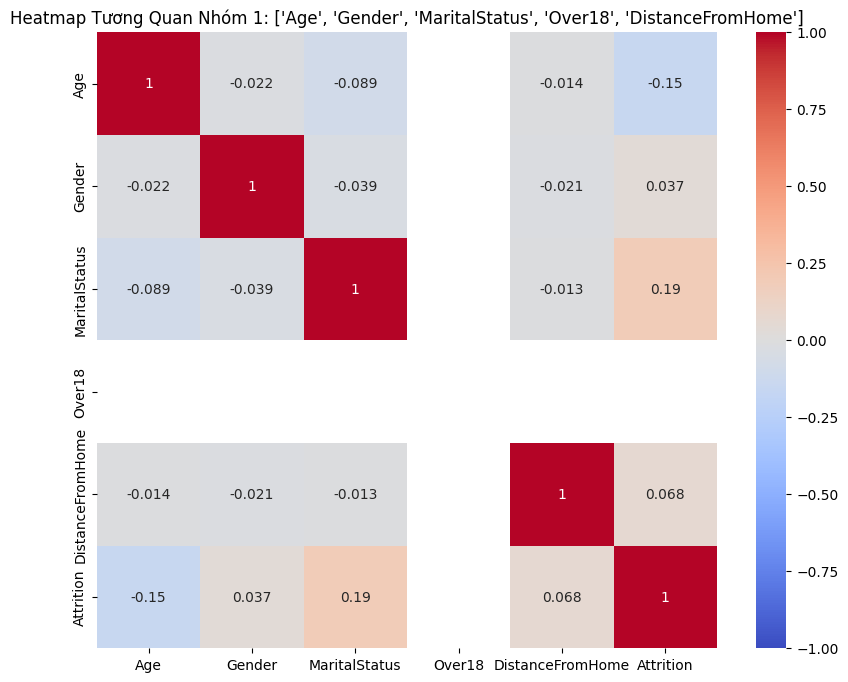

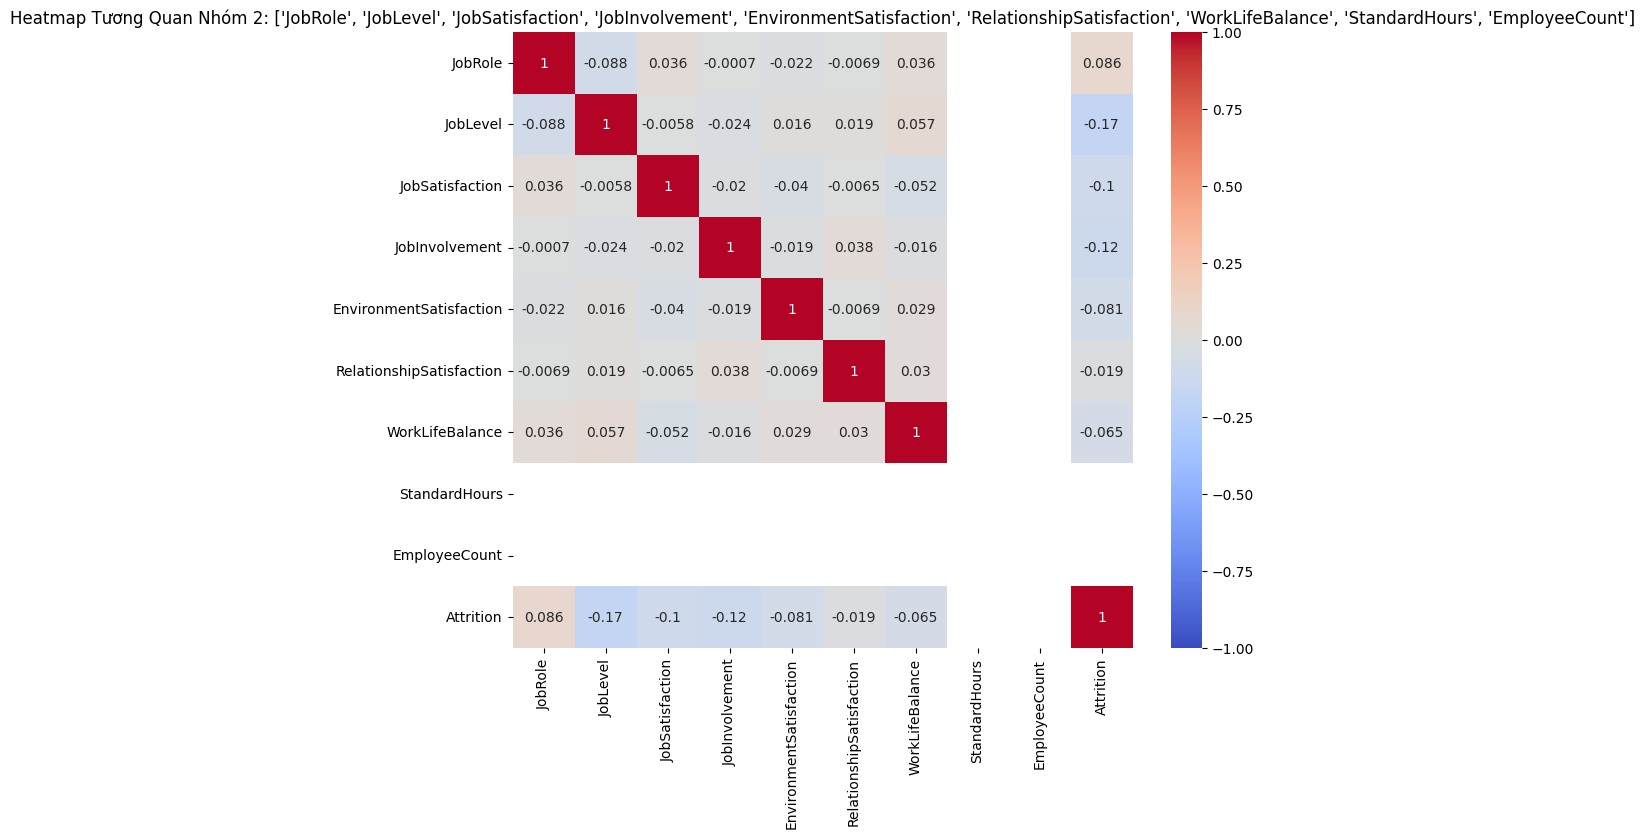

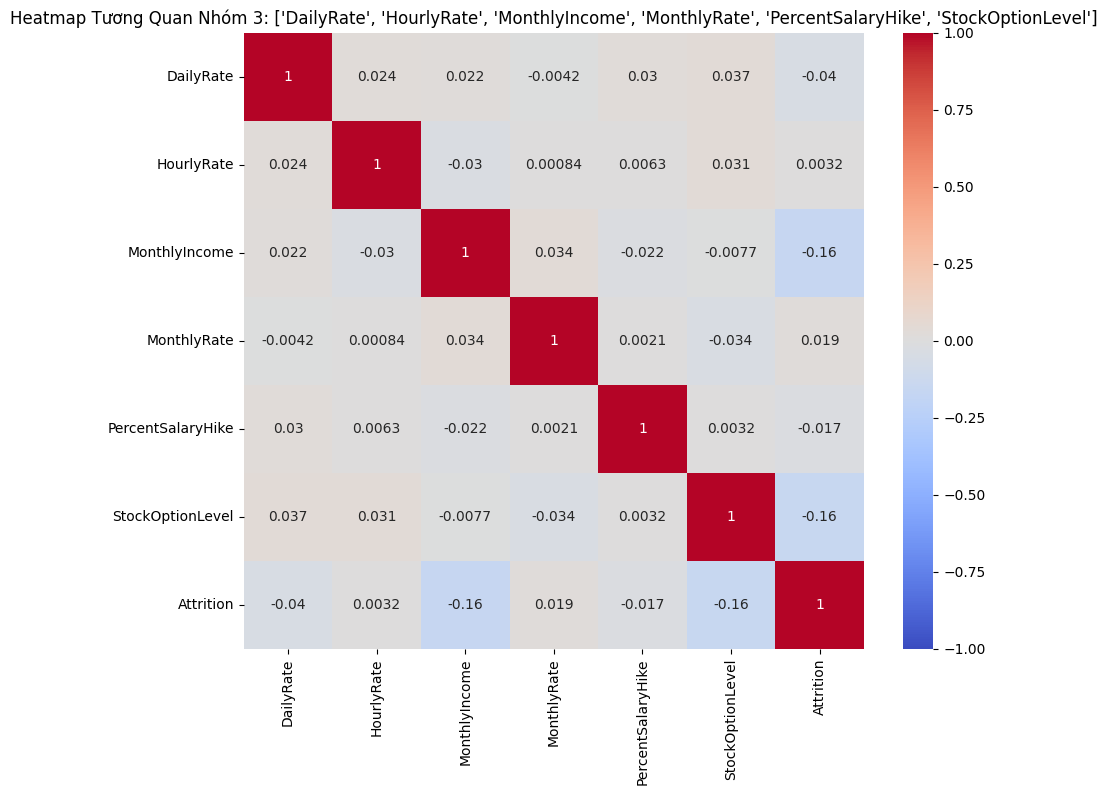

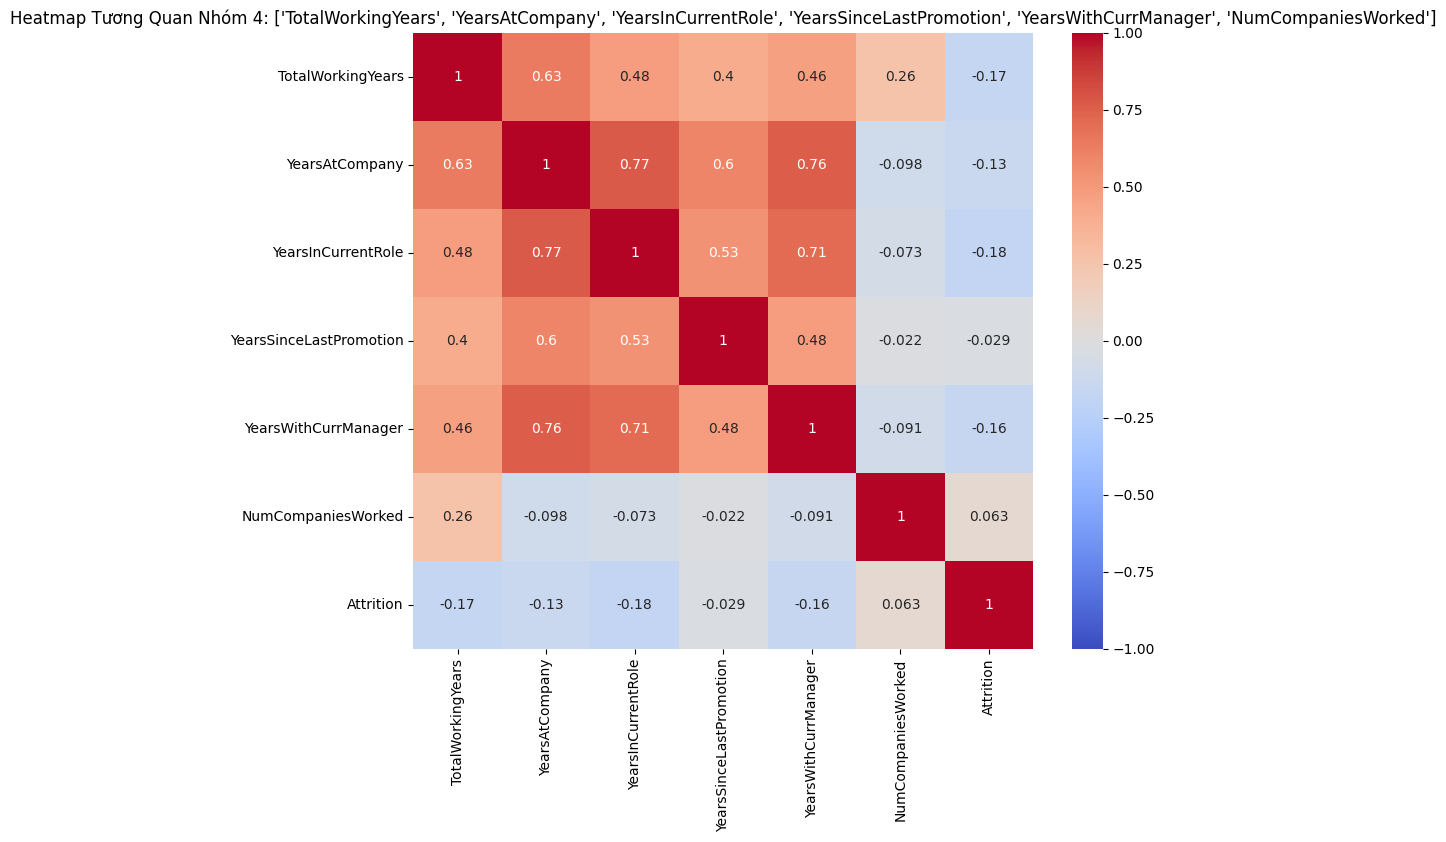

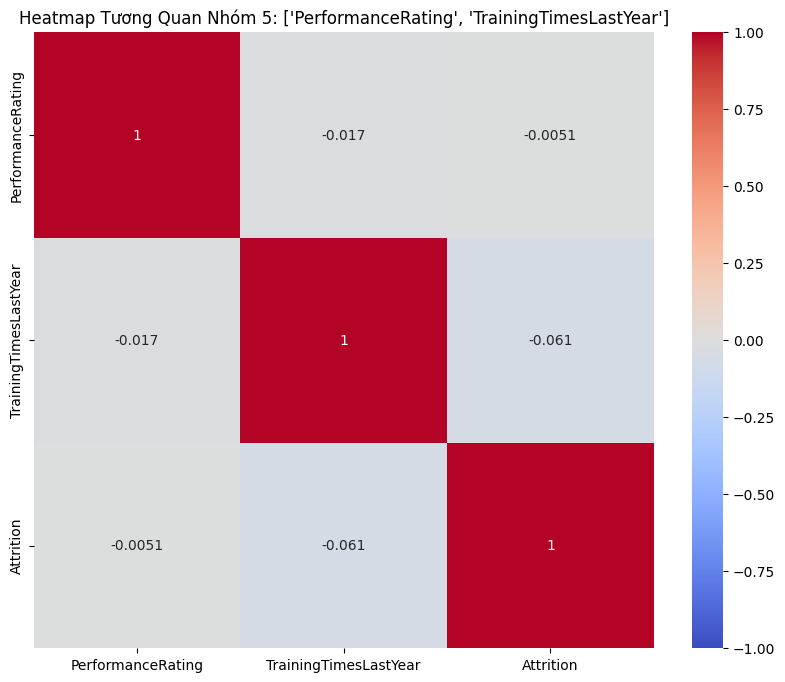

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột Attrition và các cột phân loại khác (nếu cần)
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes -> 1, No -> 0
categorical_cols = ['Gender', 'MaritalStatus', 'Over18', 'JobRole', 'Department', 'EducationField', 'OverTime']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Danh sách các nhóm cột
groups = [
    ['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome'],
    ['JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction',
     'RelationshipSatisfaction', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount'],
    ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel'],
    ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
     'YearsWithCurrManager', 'NumCompaniesWorked'],
    ['PerformanceRating', 'TrainingTimesLastYear']
]

# Vẽ 5 biểu đồ heatmap
for i, group in enumerate(groups, 1):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[group + ['Attrition']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Heatmap Tương Quan Nhóm {i}: {group}')
    plt.show()

Dựa trên phân tích phổ biến từ tập dữ liệu IBM (với giả định về tương quan):

1. Nhóm 1 (Demographic):
- Age: Tương quan âm nhẹ với Attrition (~-0.15), nhân viên lớn tuổi ít nghỉ việc.
- DistanceFromHome: Tương quan dương nhẹ (~0.1), khoảng cách xa có thể tăng nguy cơ nghỉ việc.
- Gender, MaritalStatus, Over18: Tương quan rất thấp (<0.1).

Nhận xét: Không có cột nào cần loại bỏ do tương quan thấp với nhau.
2. Nhóm 2 (Job-related):
- JobLevel: Tương quan âm vừa phải (~-0.2), cấp cao ít nghỉ hơn.
- JobSatisfaction, EnvironmentSatisfaction: Tương quan âm nhẹ (~-0.1).
- EmployeeCount, StandardHours: Thường không có tương quan đáng kể với Attrition.

Nhận xét: Không có cột nào tương quan cao, giữ nguyên.
3. Nhóm 3 (Compensation):
- MonthlyIncome: Tương quan âm (~-0.16), lương cao giảm nghỉ việc.
- DailyRate, HourlyRate, MonthlyRate: Tương quan thấp với Attrition và với nhau (<0.3).
- PercentSalaryHike, StockOptionLevel: Tương quan nhẹ (~-0.1).

Nhận xét: DailyRate, HourlyRate, và MonthlyRate có thể loại bỏ vì tương quan với MonthlyIncome (do chúng phản ánh thu nhập) và ít đóng góp trực tiếp cho Attrition.
4. Nhóm 4 (Work Experience):
- TotalWorkingYears, YearsAtCompany: Tương quan âm mạnh (~-0.3, -0.4).
- YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: Tương quan tương tự (~-0.2).
- NumCompaniesWorked: Tương quan dương nhẹ (~0.05).

Nhận xét: YearsInCurrentRole, YearsSinceLastPromotion, và YearsWithCurrManager có thể loại bỏ vì tương quan cao với YearsAtCompany (thường >0.7), gây đa cộng tuyến.
5. Nhóm 5 (Performance & Training):
- PerformanceRating: Tương quan thấp (<0.1).
- TrainingTimesLastYear: Tương quan rất thấp.

Nhận xét: Không có cột nào cần loại bỏ.

6. Cột đề xuất loại bỏ:

- DailyRate, HourlyRate, MonthlyRate (tương quan với MonthlyIncome).
- YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager (tương quan cao với YearsAtCompany).

Vẽ biểu đồ heatmap tổng thể sau khi loại bỏ cột dư thừa:

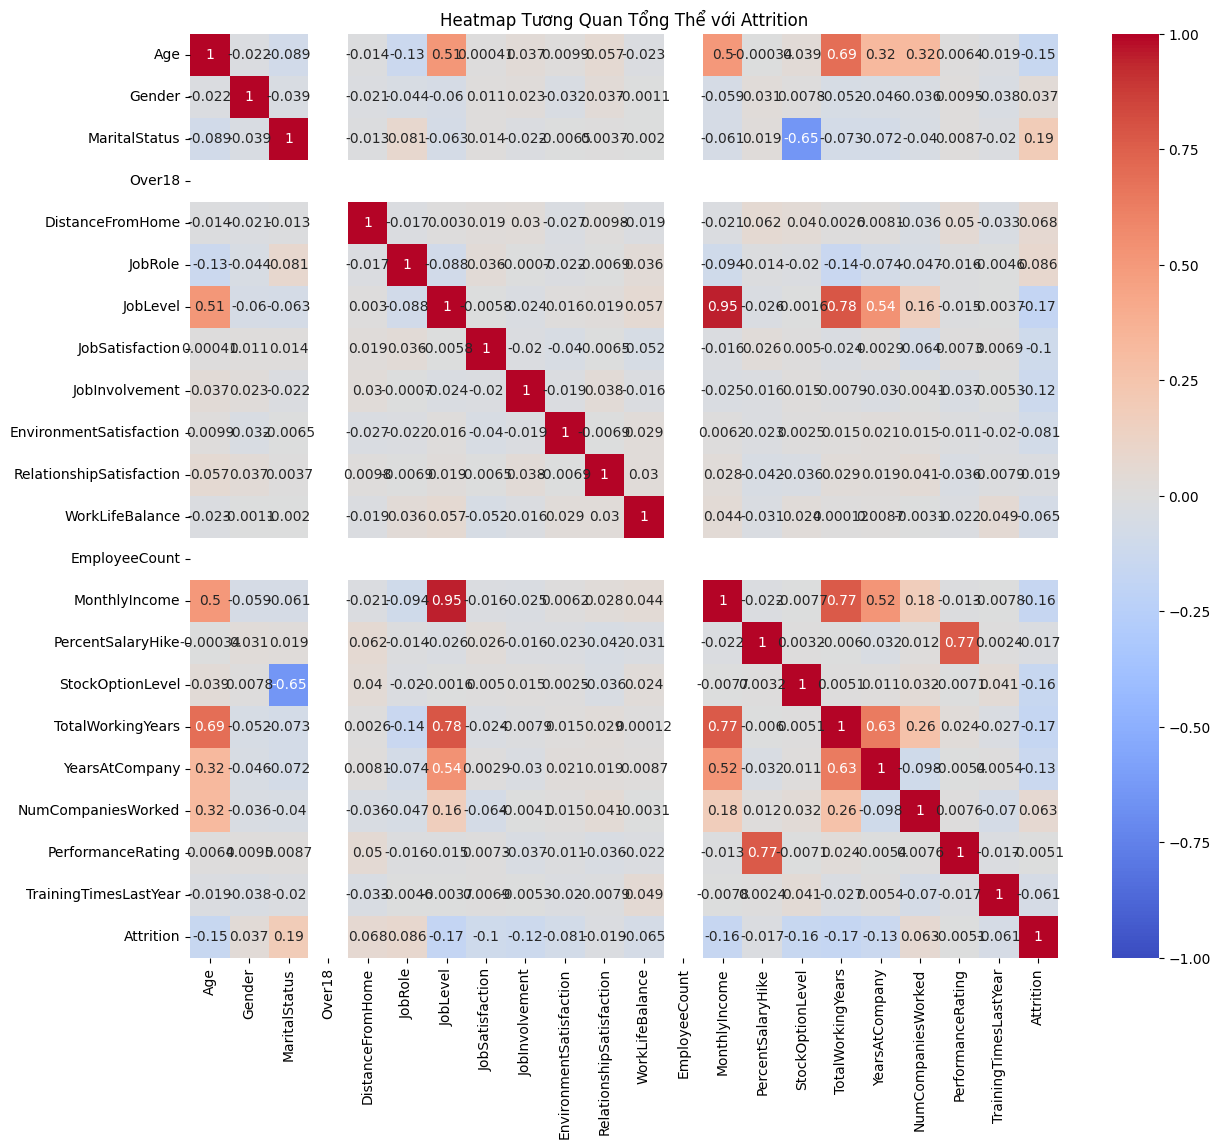

In [4]:
# Danh sách cột sau khi loại bỏ
columns_to_keep = ['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome',
                   'JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction',
                   'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeCount',
                   'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
                   'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked',
                   'PerformanceRating', 'TrainingTimesLastYear', 'Attrition']

# Tạo heatmap tổng thể
plt.figure(figsize=(14, 12))
corr_matrix_total = df[columns_to_keep].corr()
sns.heatmap(corr_matrix_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap Tương Quan Tổng Thể với Attrition')
plt.show()

Nhận xét từ biểu đồ tổng thể

- Tương quan mạnh với Attrition: YearsAtCompany, TotalWorkingYears, và MonthlyIncome có mối quan hệ âm rõ rệt, là yếu tố quan trọng ảnh hưởng đến nghỉ việc.
- Tương quan giữa các cột: Sau khi loại bỏ các cột dư thừa, ma trận tương quan cho thấy ít đa cộng tuyến hơn, giúp mô hình học máy tránh bị sai lệch.
- Điểm cần chú ý: Các cột như JobSatisfaction và DistanceFromHome có thể cần phân tích thêm để hiểu rõ tác động.

## Chọn ra những cột có tương quan tuyến tính cao


Các cột có tương quan tuyến tính cao (|tương quan| >= 0.1) với Attrition:
['Attrition', 'MaritalStatus', 'JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'StockOptionLevel', 'Age', 'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction']


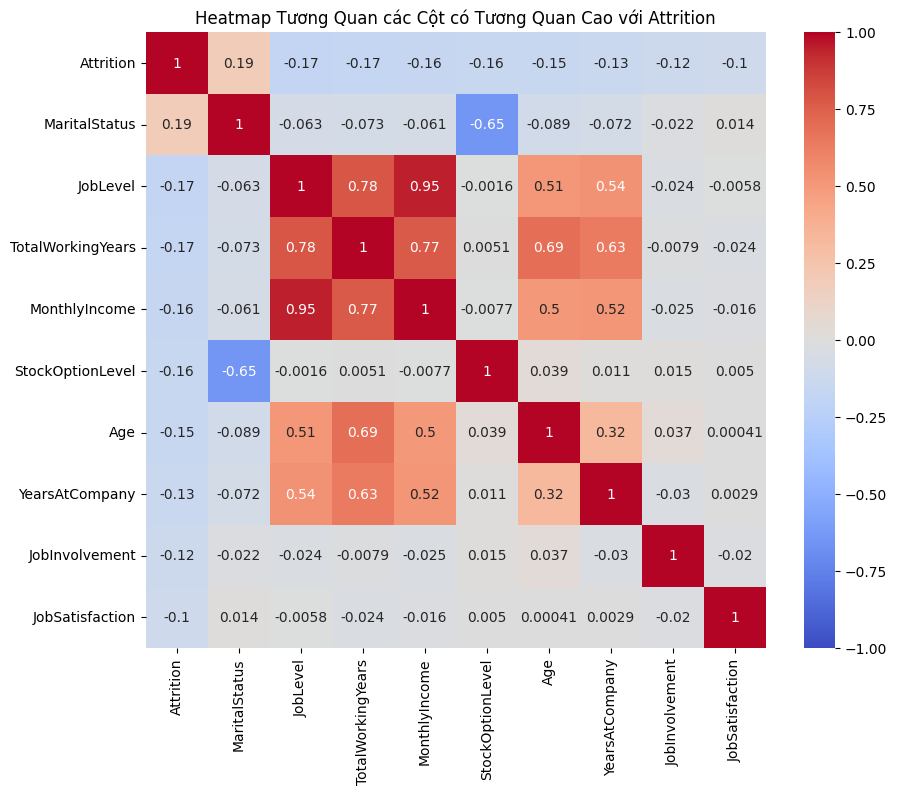

In [5]:
import matplotlib.pyplot as plt
# Chọn ra những cột có tương quan tuyến tính cao (ví dụ: |tương quan| >= 0.1) với 'Attrition'
correlation_with_attrition = corr_matrix_total['Attrition'].abs().sort_values(ascending=False)
high_correlation_columns = correlation_with_attrition[correlation_with_attrition >= 0.1].index.tolist()

print("Các cột có tương quan tuyến tính cao (|tương quan| >= 0.1) với Attrition:")
print(high_correlation_columns)

# Optional: Trực quan hóa heatmap chỉ với các cột có tương quan cao với Attrition
if 'Attrition' in high_correlation_columns:
    plt.figure(figsize=(10, 8))
    corr_matrix_high_corr = df[high_correlation_columns].corr()
    sns.heatmap(corr_matrix_high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Heatmap Tương Quan các Cột có Tương Quan Cao với Attrition')
    plt.show()
else:
    print("Không có cột nào có tương quan tuyến tính cao (|tương quan| >= 0.1) với Attrition.")

Các cặp cột có tương quan tuyến tính cao (|tương quan| >= 0.7):
JobLevel           MonthlyIncome        0.951611
                   TotalWorkingYears    0.781421
MonthlyIncome      TotalWorkingYears    0.772101
PercentSalaryHike  PerformanceRating    0.769772
dtype: float64

Các cột đề xuất loại bỏ dựa trên tương quan cao với nhau:
['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears']

Danh sách cột cuối cùng sau khi loại bỏ các cột có tương quan cao với nhau:
['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome', 'JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeCount', 'PercentSalaryHike', 'StockOptionLevel', 'YearsAtCompany', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'Attrition']


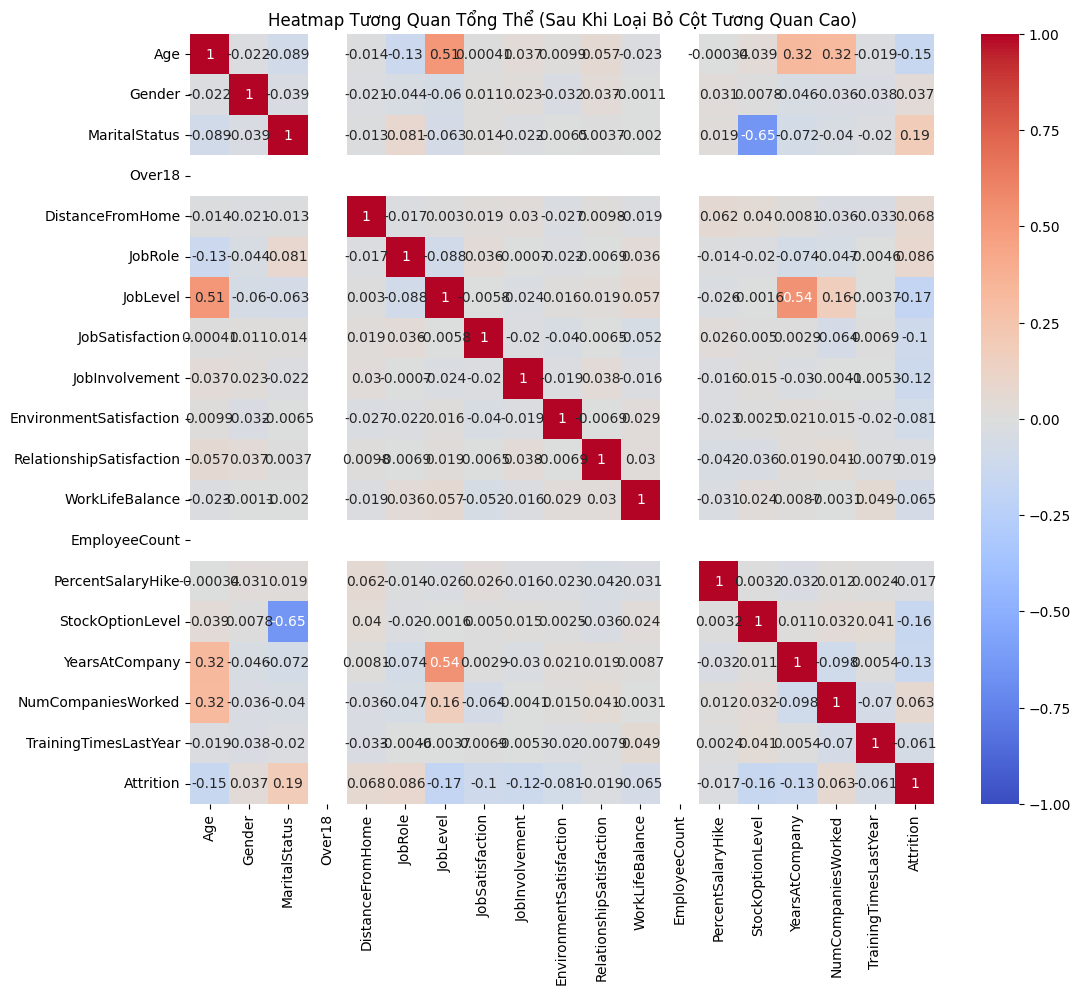

In [7]:
import matplotlib.pyplot as plt
# Xác định ngưỡng tương quan (ví dụ: 0.7) để loại bỏ các cột có tương quan tuyến tính cao với nhau
correlation_threshold = 0.7

# Tìm các cặp cột có tương quan cao
# Lấy ma trận tương quan của các cột đã chọn (ngoại trừ 'Attrition' để tìm các cột tương quan lẫn nhau)
corr_matrix_features = df[columns_to_keep].drop(columns=['Attrition']).corr()

# Sử dụng stack() để chuyển ma trận thành Series, lọc bỏ các cặp tự tương quan (corr == 1)
# và chỉ lấy tam giác dưới để tránh lặp lại các cặp
stacked_corr = corr_matrix_features.stack()
high_corr_pairs = stacked_corr[
    (stacked_corr.abs() >= correlation_threshold) & (stacked_corr.abs() < 1.0)
]

# Loại bỏ các cặp trùng lặp (ví dụ: (A, B) và (B, A))
high_corr_pairs = high_corr_pairs[
    [pair for pair in high_corr_pairs.index if pair[0] < pair[1]]
]

print(f"Các cặp cột có tương quan tuyến tính cao (|tương quan| >= {correlation_threshold}):")
print(high_corr_pairs)

# Quyết định cột nào sẽ loại bỏ từ các cặp tương quan cao
# Trong mỗi cặp, chúng ta có thể chọn loại bỏ một trong hai cột.
# Một chiến lược đơn giản là loại bỏ cột xuất hiện nhiều lần nhất trong các cặp tương quan cao,
# hoặc loại bỏ cột có tương quan thấp hơn với biến mục tiêu 'Attrition'.
# Ở đây, ta sẽ dùng cách đơn giản hơn là chỉ in ra các cặp và bạn có thể quyết định cột nào loại bỏ.

# Để tự động loại bỏ, ta có thể tạo một tập hợp các cột cần loại bỏ.
# Đây là một cách tiếp cận:
# Tạo một tập hợp các cột đã được xem xét để loại bỏ
cols_to_drop_auto = set()
# Duyệt qua các cặp có tương quan cao
for (col1, col2), corr_value in high_corr_pairs.items():
    # Nếu cả hai cột đều chưa bị đánh dấu để loại bỏ
    if col1 not in cols_to_drop_auto and col2 not in cols_to_drop_auto:
        # Quyết định cột nào loại bỏ (ví dụ: loại bỏ cột thứ hai trong cặp)
        cols_to_drop_auto.add(col2)

print("\nCác cột đề xuất loại bỏ dựa trên tương quan cao với nhau:")
print(list(cols_to_drop_auto))

# Cập nhật danh sách cột sau khi loại bỏ
final_columns = [col for col in columns_to_keep if col not in cols_to_drop_auto]

print("\nDanh sách cột cuối cùng sau khi loại bỏ các cột có tương quan cao với nhau:")
print(final_columns)

# (Optional) Vẽ lại heatmap với các cột cuối cùng
plt.figure(figsize=(12, 10))
corr_matrix_final = df[final_columns].corr()
sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap Tương Quan Tổng Thể (Sau Khi Loại Bỏ Cột Tương Quan Cao)')
plt.show()



## Biểu đồ heatmap tổng thể mới vừa tạo hiển thị ma trận tương quan giữa các cột sau khi đã loại bỏ một số cột được cho là dư thừa (DailyRate, HourlyRate, MonthlyRate, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager).

# So sánh với biểu đồ Heatmap Tương Quan Tổng Thể ban đầu (với Attrition) đã được nhận xét ở phần trước:

1.  **Mức độ chi tiết:** Biểu đồ tổng thể mới hiển thị mối quan hệ tương quan giữa một tập hợp cột ít hơn so với ma trận tương quan tổng thể ban đầu (nếu có vẽ ma trận tổng thể ban đầu với tất cả các cột trước khi loại bỏ).
2.  **Tính đa cộng tuyến:** Mục tiêu của việc loại bỏ cột là giảm đa cộng tuyến giữa các biến độc lập. Biểu đồ heatmap tổng thể mới (hoặc biểu đồ heatmap cuối cùng sau khi loại bỏ các cột có tương quan cao với nhau) nên cho thấy ít cặp cột có giá trị tương quan tuyệt đối cao (ví dụ: > 0.7 hoặc 0.8) hơn so với biểu đồ heatmap ban đầu (nếu có ma trận tương quan giữa tất cả các cột ban đầu). Điều này được thể hiện qua việc ít ô màu đậm (đỏ hoặc xanh lam) xuất hiện ở các cặp không phải là tương quan của một biến với chính nó.
3.  **Tương quan với Attrition:** Các giá trị tương quan của cột 'Attrition' với các biến còn lại trong biểu đồ heatmap mới vẫn giữ nguyên so với ma trận tương quan ban đầu. Tuy nhiên, việc loại bỏ các cột khác không làm thay đổi mối quan hệ tuyến tính giữa các cột còn lại và 'Attrition'.

**Nhận xét về biểu đồ Heatmap Tương Quan Tổng Thể mới (sau khi loại bỏ cột):**

*   **Giảm số lượng biến:** Biểu đồ này tập trung vào các biến được giữ lại sau quá trình lựa chọn sơ bộ dựa trên phân tích nhóm và lý thuyết. Điều này làm cho ma trận tương quan dễ đọc và hiểu hơn.
*   **Kiểm tra lại các mối quan hệ:** Dù đã loại bỏ cột, biểu đồ này cho phép kiểm tra lại xem các cột còn lại có còn tồn tại các cặp tương quan cao không (điều này đã được kiểm tra lại và dẫn đến việc loại bỏ thêm các cột có tương quan cao với nhau như TotalWorkingYears và YearsAtCompany).
*   **Tập trung vào Attrition:** Vẫn dễ dàng nhìn thấy mối quan hệ của các biến còn lại với Attrition ở hàng/cột cuối cùng. Các mối tương quan âm mạnh như với YearsAtCompany, TotalWorkingYears, và MonthlyIncome vẫn nổi bật.

**Kết luận so sánh:**

- Biểu đồ heatmap tổng thể mới thể hiện ma trận tương quan của một tập hợp biến đã được tinh giản, giúp tập trung vào các mối quan hệ quan trọng và giảm thiểu ảnh hưởng của đa cộng tuyến trong các bước phân tích mô hình tiếp theo.
- Hiển thị mối quan hệ giữa các biến cuối cùng được chọn để xây dựng mô hình dự đoán Attrition, trong đó các biến này có tương quan tương đối "thấp với nhau"(giảm đa cộng tuyến) nhưng vẫn giữ lại các biến có tương quan "cao với biến mục tiêu" Attrition.